<table align="center" width=100%>
    <tr>
        <td width="15%">
            <img src="in_class.png">
        </td>
        <td>
            <div align="center">
                <font color="#21618C" size=8px>
                    <b> (Week- 1)
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

### About the data set 1 (Life Expectancy data)

The dataset contains information about several health and economic factors that contribute to average life expectancy for different countries. <br> Attribute information: 

**Country:** Name of the country

**Status:** Whether the country is Developed or Developing

**Adult_Mortality:** Mortality rate for age group 15-60 out of every 1000 individuals of the population

**Infant_Deaths:** Number of infant deaths per 1000 population

**Hepatitis:** Hepatitis B (HepB) immunization coverage for 1 year olds (Percentage)

**Measles:** Number of reported cases for measles per 1000 from population

**BMI:** Average Body Mass Index for entire population

**Underfive_Deaths:** Number of deaths under 5 years of age per 1000 population

**Polio:** Polio (Pol3) immunization coverage for 1 year olds (Percentage)

**Diphtheria:** Diphtheria tetanus toxoid and pertussis (DTP3) immunization coverage for 1 year olds (Percentage)

**HIV:** Deaths per 1000 live births due to HIV/AIDS (0-4 years)

**GDP:** Gross Domestic Product per capita (in USD)

**Population:** Population of the country

**Malnourished10_19:** Prevalence of malnutrition among children and adolescents for Age 10 to 19 (Percentage)

**Malnourished5_9:** Prevalence of malnutrition among children for Age 5 to 9 (Percentage)

**Income_Index:** Human Development Index (HDI) in terms of national income per capita (index ranging from 0 to 1)

**Schooling:** Number of years of Schooling

**Life_Expectancy:** Life Expectancy in age for the country





## Table of Content

1. **[Bivariate Regression](#Bivariate)**
2. **[Multiple Linear Regression (MLR)](#MLR)**
3. **[Inferences about slope](#ins)**
4. **[Model Evaluation](#ML_eval)**
5. **[Assumptions of Linear Regression](#assum)**
6. **[Model Performance](#ml_perf)**

**Import the required libraries**

In [3]:
# type your code here
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Load the first dataset and check the first five observations

Load the csv file and set the first column as index

In [4]:
# load the csv file

# type your code here

df= pd.read_csv("Life_Expectancy.csv")
df.head()

,Country,Status,Adult_Mortality,Infant_Deaths,Hepatitis,Measles,BMI,Underfive_Deaths,Polio,Diphtheria,HIV,GDP,Population,Malnourished10_19,Malnourished5_9,Income_Index,Schooling,Expected
0,Afghanistan,Developing,263,62,65,1154,19.1,83,6,65,0.1,584.259210,33736494,17.2,17.3,0.479,10.1,65.0
1,Albania,Developing,8,0,98,0,57.2,1,98,98,0.1,4575.763787,288914,1.2,1.3,0.761,14.2,77.5
2,Algeria,Developing,19,21,95,63,59.5,24,95,95,0.1,4132.762920,39871528,6.0,5.8,0.743,14.4,75.6
3,Angola,Developing,335,66,64,118,23.3,98,7,64,1.9,3695.793748,2785935,8.3,8.2,0.531,11.4,52.4
4,Argentina,Developing,116,8,94,0,62.8,9,93,94,0.1,13467.123600,43417765,1.0,0.9,0.826,17.3,76.3


### Let's begin with some hands-on practice exercises

<a id="Bivariate"> </a>
## 1. Bivariate Regression

## We shall use the life expectancy dataset

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>1. How do we analyze the impact of adult mortality rate on average life expectancy of a country?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [5]:
df.shape

(124, 18)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124 entries, 0 to 123
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Country             124 non-null    object 
 1   Status              124 non-null    object 
 2   Adult_Mortality     124 non-null    int64  
 3   Infant_Deaths       124 non-null    int64  
 4   Hepatitis           124 non-null    int64  
 5   Measles             124 non-null    int64  
 6    BMI                124 non-null    float64
 7   Underfive_Deaths    124 non-null    int64  
 8   Polio               124 non-null    int64  
 9   Diphtheria          124 non-null    int64  
 10   HIV                124 non-null    float64
 11  GDP                 124 non-null    float64
 12  Population          124 non-null    int64  
 13  Malnourished10_19   124 non-null    float64
 14  Malnourished5_9     124 non-null    float64
 15  Income_Index        124 non-null    float64
 16  Schoolin

In [7]:
df.describe()

,Adult_Mortality,Infant_Deaths,Hepatitis,Measles,BMI,Underfive_Deaths,Polio,Diphtheria,HIV,GDP,Population,Malnourished10_19,Malnourished5_9,Income_Index,Schooling,Expected
count,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,1.240000e+02,124.000000,124.000000,124.000000,124.000000,124.000000
mean,160.475806,27.637097,85.104839,2841.637097,41.733871,36.798387,86.637097,87.919355,0.819355,6866.816502,1.960604e+07,4.180645,4.373387,0.690685,13.085484,71.220968
std,101.794506,94.347510,20.839229,11517.586950,21.186385,122.248912,21.653342,19.122879,1.764127,10885.243579,4.100762e+07,4.086736,4.212797,0.168296,2.909242,8.467924
min,3.000000,0.000000,6.000000,0.000000,2.100000,0.000000,6.000000,6.000000,0.100000,5.668726,8.381000e+03,0.300000,0.200000,0.332000,5.300000,48.600000
25%,73.500000,1.000000,82.000000,0.750000,20.950000,1.000000,88.000000,89.000000,0.100000,639.799727,8.215560e+05,1.500000,1.575000,0.551500,10.875000,65.175000
50%,139.500000,10.000000,94.000000,37.000000,54.100000,12.000000,95.000000,95.000000,0.100000,2728.291765,4.234054e+06,2.400000,2.800000,0.740000,13.300000,72.200000
75%,234.000000,21.000000,97.000000,588.750000,59.750000,26.500000,98.000000,98.000000,0.400000,8437.562893,1.482767e+07,6.425000,6.425000,0.799000,15.000000,77.500000
max,438.000000,910.000000,99.000000,90387.000000,71.400000,1100.000000,99.000000,99.000000,8.100000,56554.387600,2.581621e+08,26.700000,27.300000,0.945000,20.400000,86.000000


In [8]:
df.columns

Index(['Country', 'Status', 'Adult_Mortality', 'Infant_Deaths', 'Hepatitis ',
       'Measles ', ' BMI ', 'Underfive_Deaths ', 'Polio', 'Diphtheria ',
       ' HIV', 'GDP', 'Population', 'Malnourished10_19 ', 'Malnourished5_9',
       'Income_Index', 'Schooling', 'Expected'],
      dtype='object')

<Axes: xlabel='Adult_Mortality', ylabel='Expected'>

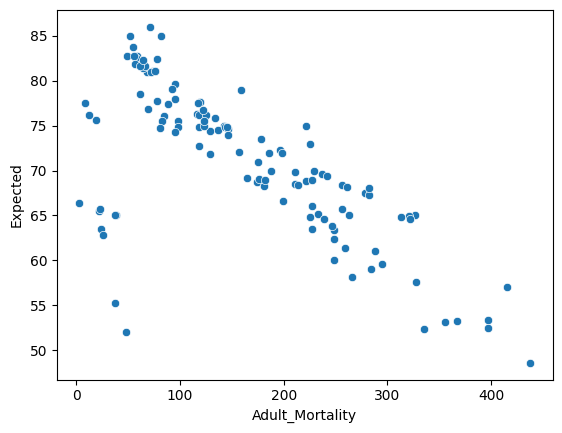

In [9]:
# type your code here
sns.scatterplot(x=df['Adult_Mortality'],y=df['Expected'])

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>2. A regression model is built to check the impact of Human Development Index (Income) on the life expectancy of a nation. What is the expected error value?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [10]:
import statsmodels
import statsmodels.api as sm

In [11]:
x=df['Income_Index']
y=df['Expected']
X_const = sm.add_constant(x)
SLR_model = sm.OLS(y,X_const).fit()
SLR_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Expected   R-squared:                       0.711
Model:                            OLS   Adj. R-squared:                  0.709
Method:                 Least Squares   F-statistic:                     300.0
Date:                Thu, 20 Feb 2025   Prob (F-statistic):           1.13e-34
Time:                        09:09:09   Log-Likelihood:                -363.40
No. Observations:                 124   AIC:                             730.8
Df Residuals:                     122   BIC:                             736.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           41.9191      1.741     24.081      0.000      38.473      45.365
Income_Index    42.4243      2.449     17.322      0.000      37.576      47.273
==============================================================================
Omnibus:                       11.870   Durbin-Watson:                   1.355
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               26.475
Skew:                           0.280   Prob(JB):                     1.78e-06
Kurtosis:                       5.193   Cond. No.                         8.87
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [12]:
# type your code here
y_pred = SLR_model.predict(X_const)
residuals = y-y_pred
print(residuals)

0       2.759637
1       3.295989
2       2.159626
3     -12.046426
4      -0.661589
         ...    
119    -3.079753
120    -4.258540
121    -5.149449
122     0.529340
123    -7.403993
Length: 124, dtype: float64


In [13]:
MSE = np.sum(residuals**2)/len(df)

In [14]:
RSME = np.sqrt(MSE)
RSME

np.float64(4.534442387966918)

<a id="MLR"> </a>
## 2. Multiple Linear Regression(MLR)

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>3. Analyze the impact of immunization on life expectancy. </b>
                </font>
            </div>
        </td>
9"    </tr>
</table>'

In [15]:
df.columns

Index(['Country', 'Status', 'Adult_Mortality', 'Infant_Deaths', 'Hepatitis ',
       'Measles ', ' BMI ', 'Underfive_Deaths ', 'Polio', 'Diphtheria ',
       ' HIV', 'GDP', 'Population', 'Malnourished10_19 ', 'Malnourished5_9',
       'Income_Index', 'Schooling', 'Expected'],
      dtype='object')

In [16]:
x=df.iloc[:,[4,8,9]]
y=df['Expected']
X_const = sm.add_constant(x)
mlr_model = sm.OLS(y,X_const).fit()
mlr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Expected   R-squared:                       0.138
Model:                            OLS   Adj. R-squared:                  0.116
Method:                 Least Squares   F-statistic:                     6.395
Date:                Thu, 20 Feb 2025   Prob (F-statistic):           0.000468
Time:                        09:09:09   Log-Likelihood:                -431.15
No. Observations:                 124   AIC:                             870.3
Df Residuals:                     120   BIC:                             881.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          57.9881      3.524     16.453      0.000      51.010      64.966
Hepatitis      -0.1037      0.068     -1.528      0.129      -0.238       0.031
Polio           0.0910      0.043      2.099      0.038       0.005       0.177
Diphtheria      0.1613      0.082      1.969      0.051      -0.001       0.323
==============================================================================
Omnibus:                        4.513   Durbin-Watson:                   1.000
Prob(Omnibus):                  0.105   Jarque-Bera (JB):                4.279
Skew:                          -0.396   Prob(JB):                        0.118
Kurtosis:                       2.550   Cond. No.                         755.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>4. If the information that whether the country is a developed or a developing country is included, does it alter the impact of immunzation on life expectancy ?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [17]:
df['Status'].unique()
X= df.iloc[:,[4,8,9]]
encod_status = pd.get_dummies(df['Status'],drop_first = 1,prefix = 'Status',dtype = int)
X_encod= pd.concat([X,encod_status],axis=1)
X_encod.head()

,Hepatitis,Polio,Diphtheria,Status_Developing
0,65,6,65,1
1,98,98,98,1
2,95,95,95,1
3,64,7,64,1
4,94,93,94,1


In [18]:
y= df["Expected"]
X_const= sm.add_constant(X_encod)
mlr_model = sm.OLS(y,X_const).fit()
mlr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Expected   R-squared:                       0.321
Model:                            OLS   Adj. R-squared:                  0.298
Method:                 Least Squares   F-statistic:                     14.06
Date:                Thu, 20 Feb 2025   Prob (F-statistic):           2.00e-09
Time:                        09:09:09   Log-Likelihood:                -416.35
No. Observations:                 124   AIC:                             842.7
Df Residuals:                     119   BIC:                             856.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                69.8090      3.771     18.512      0.000      62.342      77.276
Hepatitis            -0.0035      0.063     -0.056      0.955      -0.128       0.121
Polio                 0.0771      0.039      1.993      0.049       0.000       0.154
Diphtheria            0.0456      0.076      0.602      0.548      -0.104       0.196
Status_Developing   -10.6036      1.872     -5.664      0.000     -14.310      -6.897
==============================================================================
Omnibus:                        2.973   Durbin-Watson:                   1.211
Prob(Omnibus):                  0.226   Jarque-Bera (JB):                2.635
Skew:                          -0.355   Prob(JB):                        0.268
Kurtosis:                       3.077   Cond. No.                         946.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<a id="ins"> </a>
## 3. Inferences about slope

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>5. Find the significant variables in the full model when all the variables are considered for prediction of life expectancy.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [19]:
df.head()

,Country,Status,Adult_Mortality,Infant_Deaths,Hepatitis,Measles,BMI,Underfive_Deaths,Polio,Diphtheria,HIV,GDP,Population,Malnourished10_19,Malnourished5_9,Income_Index,Schooling,Expected
0,Afghanistan,Developing,263,62,65,1154,19.1,83,6,65,0.1,584.259210,33736494,17.2,17.3,0.479,10.1,65.0
1,Albania,Developing,8,0,98,0,57.2,1,98,98,0.1,4575.763787,288914,1.2,1.3,0.761,14.2,77.5
2,Algeria,Developing,19,21,95,63,59.5,24,95,95,0.1,4132.762920,39871528,6.0,5.8,0.743,14.4,75.6
3,Angola,Developing,335,66,64,118,23.3,98,7,64,1.9,3695.793748,2785935,8.3,8.2,0.531,11.4,52.4
4,Argentina,Developing,116,8,94,0,62.8,9,93,94,0.1,13467.123600,43417765,1.0,0.9,0.826,17.3,76.3


In [20]:
X = df.drop(["Country","Expected","Status"],axis=1)
y = df['Expected']

encod_status = pd.get_dummies(df['Status'],drop_first = 1,prefix = 'Status',dtype =int)
X_encod=pd.concat([X,encod_status],axis=1)
X_const = sm.add_constant(X_encod)
mlr_model = sm.OLS(y,X_const).fit()
mlr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Expected   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     37.43
Date:                Thu, 20 Feb 2025   Prob (F-statistic):           1.94e-36
Time:                        09:09:09   Log-Likelihood:                -323.38
No. Observations:                 124   AIC:                             680.8
Df Residuals:                     107   BIC:                             728.7
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 60.0678      3.747     16.030      0.000      52.639      67.496
Adult_Mortality       -0.0231      0.004     -5.685      0.000      -0.031      -0.015
Infant_Deaths          0.0556      0.037      1.507      0.135      -0.018       0.129
Hepatitis              0.0656      0.032      2.056      0.042       0.002       0.129
Measles             -5.93e-05   6.09e-05     -0.974      0.332      -0.000    6.14e-05
 BMI                  -0.0266      0.023     -1.179      0.241      -0.071       0.018
Underfive_Deaths      -0.0389      0.027     -1.439      0.153      -0.093       0.015
Polio                 -0.0091      0.022     -0.417      0.677      -0.053       0.034
Diphtheria            -0.0345      0.040     -0.868      0.387      -0.113       0.044
 HIV                  -1.0385      0.268     -3.881      0.000      -1.569      -0.508
GDP                 5.021e-05   3.48e-05      1.445      0.151   -1.87e-05       0.000
Population         -1.845e-08    8.6e-09     -2.146      0.034   -3.55e-08   -1.41e-09
Malnourished10_19     -0.4850      0.300     -1.616      0.109      -1.080       0.110
Malnourished5_9        0.2983      0.283      1.053      0.294      -0.263       0.860
Income_Index          18.6518      6.313      2.955      0.004       6.138      31.166
Schooling              0.3599      0.346      1.040      0.301      -0.326       1.046
Status_Developing     -2.0360      1.168     -1.743      0.084      -4.352       0.280
==============================================================================
Omnibus:                        6.529   Durbin-Watson:                   1.754
Prob(Omnibus):                  0.038   Jarque-Bera (JB):               10.518
Skew:                           0.122   Prob(JB):                      0.00520
Kurtosis:                       4.406   Cond. No.                     9.15e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.15e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [21]:
# type your code here
# mlr_model.pvalues[mlr_model.pvalues>0.05] # Insignificant variables
mlr_model.pvalues[mlr_model.pvalues<0.05] #significant variables

const              3.282317e-30
Adult_Mortality    1.144621e-07
Hepatitis          4.216878e-02
 HIV               1.803409e-04
Population         3.409537e-02
Income_Index       3.849778e-03
dtype: float64

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>6. If economic indices are used to predict the life expectancy, calculate the total variation for the observed values of life expectancy.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [22]:
df.columns

Index(['Country', 'Status', 'Adult_Mortality', 'Infant_Deaths', 'Hepatitis ',
       'Measles ', ' BMI ', 'Underfive_Deaths ', 'Polio', 'Diphtheria ',
       ' HIV', 'GDP', 'Population', 'Malnourished10_19 ', 'Malnourished5_9',
       'Income_Index', 'Schooling', 'Expected'],
      dtype='object')

In [23]:
X = df.iloc[:,[11,15]]
y = df['Expected']
X_const = sm.add_constant(X)
mlr_model = sm.OLS(y,X_const).fit()
y_pred = mlr_model.predict(X_const)
residuals = (y-y_pred)
residuals.head()
print(y,y_pred)

0      65.0
1      77.5
2      75.6
3      52.4
4      76.3
       ... 
119    55.3
120    53.4
121    52.0
122    57.0
123    48.6
Name: Expected, Length: 124, dtype: float64 0      62.264429
1      73.998340
2      73.240868
3      64.535391
4      77.062897
         ...    
119    58.522734
120    57.823931
121    57.331190
122    56.674937
123    56.216358
Length: 124, dtype: float64


In [24]:
SST = np.sum((y-y.mean())**2)
SSR = np.sum((y_pred-y.mean())**2)
SSE = np.sum((y-y_pred)**2)
print(SSE,SSR,SST)

2527.233879871136 6292.57160399981 8819.805483870969


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>7. Determine the lower bound and upper bound for estimated value of life expectancy per unit change in HDI (for income)</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [25]:
df.columns

Index(['Country', 'Status', 'Adult_Mortality', 'Infant_Deaths', 'Hepatitis ',
       'Measles ', ' BMI ', 'Underfive_Deaths ', 'Polio', 'Diphtheria ',
       ' HIV', 'GDP', 'Population', 'Malnourished10_19 ', 'Malnourished5_9',
       'Income_Index', 'Schooling', 'Expected'],
      dtype='object')

In [26]:
# type your code here
X = df['Income_Index']
y = df['Expected']
X_const = sm.add_constant(X)
SLR_model = sm.OLS(y,X_const).fit()
SLR_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Expected   R-squared:                       0.711
Model:                            OLS   Adj. R-squared:                  0.709
Method:                 Least Squares   F-statistic:                     300.0
Date:                Thu, 20 Feb 2025   Prob (F-statistic):           1.13e-34
Time:                        09:09:10   Log-Likelihood:                -363.40
No. Observations:                 124   AIC:                             730.8
Df Residuals:                     122   BIC:                             736.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           41.9191      1.741     24.081      0.000      38.473      45.365
Income_Index    42.4243      2.449     17.322      0.000      37.576      47.273
==============================================================================
Omnibus:                       11.870   Durbin-Watson:                   1.355
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               26.475
Skew:                           0.280   Prob(JB):                     1.78e-06
Kurtosis:                       5.193   Cond. No.                         8.87
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [27]:
df['Income_Index'].min()

np.float64(0.332)

In [28]:
#y = (42.4243*HDI+41.9191)
print(X.min(),X.max())

lower_bound=lb= (42.4243*0.322+41.9191)
upper_bound=ub= (42.4243*0.945+41.9191)
print(lb,ub)

0.332 0.945
55.5797246 82.0100635


<a id="ML_eval"> </a>
## 4. Model Evaluation

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>8. A model is built to analyze the impact of mortality on Life expectancy. Would the addition of information about population of the country lead to a better prediction?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [29]:
df.columns

Index(['Country', 'Status', 'Adult_Mortality', 'Infant_Deaths', 'Hepatitis ',
       'Measles ', ' BMI ', 'Underfive_Deaths ', 'Polio', 'Diphtheria ',
       ' HIV', 'GDP', 'Population', 'Malnourished10_19 ', 'Malnourished5_9',
       'Income_Index', 'Schooling', 'Expected'],
      dtype='object')

In [30]:
# type your code here
X = df.iloc[:,[2,3,7]]
y = df['Expected']
X_const = sm.add_constant(X)
mlr_model = sm.OLS(y,X_const).fit()
mlr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Expected   R-squared:                       0.530
Model:                            OLS   Adj. R-squared:                  0.519
Method:                 Least Squares   F-statistic:                     45.18
Date:                Thu, 20 Feb 2025   Prob (F-statistic):           1.29e-19
Time:                        09:09:10   Log-Likelihood:                -393.48
No. Observations:                 124   AIC:                             795.0
Df Residuals:                     120   BIC:                             806.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                80.3623      1.004     80.060      0.000      78.375      82.350
Adult_Mortality      -0.0548      0.005     -9.996      0.000      -0.066      -0.044
Infant_Deaths         0.0905      0.049      1.844      0.068      -0.007       0.188
Underfive_Deaths     -0.0775      0.038     -2.033      0.044      -0.153      -0.002
==============================================================================
Omnibus:                       54.244   Durbin-Watson:                   1.530
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              142.185
Skew:                          -1.734   Prob(JB):                     1.33e-31
Kurtosis:                       6.937   Cond. No.                         392.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [31]:
X = df.iloc[:,[2,3,7,12]]
y = df['Expected']
X_const = sm.add_constant(X)
mlr_model = sm.OLS(y,X_const).fit()
mlr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Expected   R-squared:                       0.531
Model:                            OLS   Adj. R-squared:                  0.515
Method:                 Least Squares   F-statistic:                     33.68
Date:                Thu, 20 Feb 2025   Prob (F-statistic):           8.93e-19
Time:                        09:09:10   Log-Likelihood:                -393.41
No. Observations:                 124   AIC:                             796.8
Df Residuals:                     119   BIC:                             810.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                80.3071      1.019     78.813      0.000      78.289      82.325
Adult_Mortality      -0.0550      0.006     -9.929      0.000      -0.066      -0.044
Infant_Deaths         0.0886      0.050      1.788      0.076      -0.010       0.187
Underfive_Deaths     -0.0760      0.038     -1.975      0.051      -0.152       0.000
Population         4.736e-09   1.31e-08      0.361      0.718   -2.12e-08    3.07e-08
==============================================================================
Omnibus:                       54.418   Durbin-Watson:                   1.537
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              143.042
Skew:                          -1.738   Prob(JB):                     8.69e-32
Kurtosis:                       6.949   Cond. No.                     8.72e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.72e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>9. Fit a full model and test the significance of the overall model. <br></b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [32]:
X = df.drop(["Country","Expected","Status"],axis=1)
y = df['Expected']

encod_status = pd.get_dummies(df['Status'],drop_first = 1,prefix = 'Status',dtype =int)
X_encod=pd.concat([X,encod_status],axis=1)
X_const = sm.add_constant(X_encod)
mlr_model = sm.OLS(y,X_const).fit()
mlr_model.summary()
mlr_model.f_pvalue


#H0: The model is insignificant 
#H1: The model is significant 
# if p value is less than alpha we reject hypothesis 

np.float64(1.943066855484839e-36)

<a id="assum"> </a>
## 4. Assumptions of Linear Regression

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>10. A model is built using all the features (full model) to predict the life expectancy. Check whether the residuals obtained form the model follow a normal distribution.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [33]:
from scipy import stats
from scipy.stats import shapiro

X = df.drop(["Country","Expected","Status"],axis=1)
y = df['Expected']

encod_status = pd.get_dummies(df['Status'],drop_first = 1,prefix = 'Status',dtype =int)
X_encod=pd.concat([X,encod_status],axis=1)
X_const = sm.add_constant(X_encod)
mlr_model = sm.OLS(y,X_const).fit()
mlr_model.summary()
mlr_model.f_pvalue
stats,pvalue=shapiro(mlr_model.resid)
print('Test stastistics: ', stats)

print('pvalue',pvalue)

#H0: The model is insignificant 
#H1: The model is significant 
# if p value is less than alpha we reject hypothesis 


Test stastistics:  0.9769424921551277
pvalue 0.032092184345833184


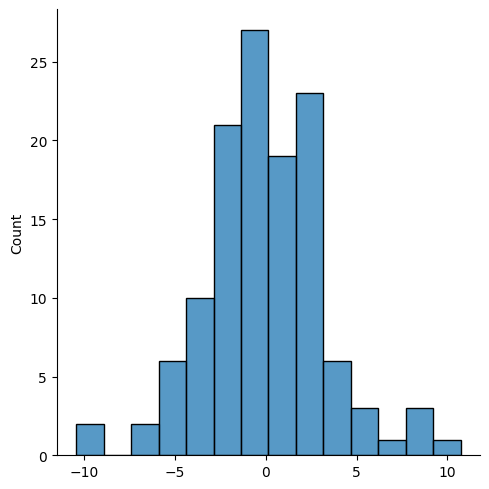

In [34]:
sns.displot(mlr_model.resid)

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                        <b>11. Does the interaction of status of the country and its GDP have significant effect on life expectancy? (consider the full model)</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [35]:
df.columns


Index(['Country', 'Status', 'Adult_Mortality', 'Infant_Deaths', 'Hepatitis ',
       'Measles ', ' BMI ', 'Underfive_Deaths ', 'Polio', 'Diphtheria ',
       ' HIV', 'GDP', 'Population', 'Malnourished10_19 ', 'Malnourished5_9',
       'Income_Index', 'Schooling', 'Expected'],
      dtype='object')

In [36]:
X = df.iloc[:,11]
y = df['Expected']
encod_status = pd.get_dummies(df['Status'],drop_first = 1,prefix = 'Status',dtype =int)
X_encod=pd.concat([X,encod_status],axis=1)
X_encod.head()
X_encod['interaction']=X_encod['Status_Developing']*X_encod['GDP']

y = df['Expected']
X_const = sm.add_constant(X_encod)
mlr_model = sm.OLS(y,X_const).fit()
mlr_model.summary()




<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Expected   R-squared:                       0.423
Model:                            OLS   Adj. R-squared:                  0.408
Method:                 Least Squares   F-statistic:                     29.30
Date:                Thu, 20 Feb 2025   Prob (F-statistic):           2.76e-14
Time:                        09:09:11   Log-Likelihood:                -406.27
No. Observations:                 124   AIC:                             820.5
Df Residuals:                     120   BIC:                             831.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                80.9524      1.990     40.675      0.000      77.012      84.893
GDP                1.283e-05   8.43e-05      0.152      0.879      -0.000       0.000
Status_Developing   -14.0075      2.130     -6.576      0.000     -18.225      -9.790
interaction           0.0005      0.000      3.961      0.000       0.000       0.001
==============================================================================
Omnibus:                        4.249   Durbin-Watson:                   1.481
Prob(Omnibus):                  0.119   Jarque-Bera (JB):                3.697
Skew:                          -0.398   Prob(JB):                        0.157
Kurtosis:                       3.286   Cond. No.                     7.14e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.14e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>12. Construct a full no-intecept model. What would you conclude when all the variables take value 0? </b>
                </font>
            </div>
        </td>
    </tr>
</table>

### Hereon on we shall consider the FEV dataset.


### About the data set (Respiratory function data)

Dataset consists of information about respiratory function in children and adolescents and factors that might impact the respiratory function. <br> Attribute information: 

**Age:** Age in years

**Height:** Height in inches 

**Gender:** Gender value is 1 if male 0 if female

**Smoke:** Whether the person is a smoker or non- smoker, the value is 1 if smoker and 0 otherwise

**FEV:**  Forced Exhalation Volume (FEV), a measure of how much air somebody can forcibly exhale from their lung (Percentage)

#### Load the dataset and check the first five observations

In [37]:
# load the csv file
# type your code here
df=pd.read_csv('LungCapdata.csv')
df.head()

,Age,Height,Gender,Smoke,FEV
0,9,57.0,0,0,1.708
1,8,67.5,0,0,1.724
2,7,54.5,0,0,1.720
3,9,53.0,1,0,1.558
4,9,57.0,1,0,1.895


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>13. Can we use a linear regression model to analyze the impact of all the features on respiratory function (FEV) ? </b>
                </font>
            </div>
        </td>
    </tr>
</table>

<Axes: >

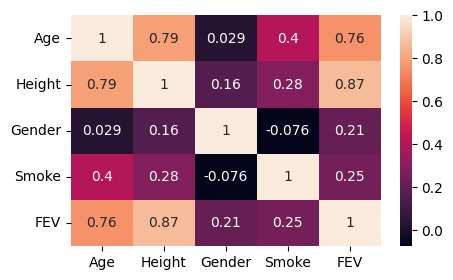

In [47]:
x=df.drop('FEV',axis=1)
y=df['FEV']
X_const=sm.add_constant(x)
mlr_model=sm.OLS(y,X_const).fit()
mlr_model.summary()

plt.subplots(figsize=(5,3))
sns.heatmap(df.corr(),annot=True,annot_kws={'size':10})


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>14. How can we rectify the multicollinearity detected in question 13? </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [48]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [49]:
df.columns

Index(['Age', 'Height', 'Gender', 'Smoke', 'FEV'], dtype='object')

In [83]:
x=df.iloc[:,:-1]
# x=df.iloc[1:10,1:-1]   # when age is removed we find then correlation kam ho jata hai i.e. close to 1
vif=pd.DataFrame()
vif['VIF_factor'] = [variance_inflation_factor(x.values,i)for i in range (x.shape[1])]
vif['Features']=x.columns
print(vif)


   VIF_factor Features
0   24.322098      Age
1   24.524524   Height
2    2.130851   Gender
3    1.342164    Smoke


In [79]:
df.iloc[1:10,1:-1]
# x.shape

,Height,Gender,Smoke
1,67.5,0,0
2,54.5,0,0
3,53.0,1,0
4,57.0,1,0
5,61.0,0,0
6,58.0,0,0
7,56.0,0,0
8,58.5,0,0
9,60.0,0,0


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>15. A Linear regression model is used to analyze the impact of all possible features on respiratory function (FEV). How do we check whether or not the model adequately captures the relationship between the response and predictor variables?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [40]:
# type your code here

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>16.  A Linear regression model is used to analyze the impact of all possible features on respiratory function (FEV). Check whether the error terms are serially independent?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [41]:
# type your code here

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>17. A model is built using all the features to predict the FEV. Check whether the residuals obtained form the model are normally distributed. </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [42]:
# type your code here

<a id="ml_perf"> </a>
## 6. Model Performance

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>18. Consider the full model. Calculate the mean square error and the root mean square error.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [43]:
# type your code here

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>19. Calculate the mean absolute error and the  mean absolute percentage error. Compare the values of RMSE and MAE. </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [44]:
# type your code here

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>20. Consider the full model, has the model overfitted? </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [45]:
# type your code here